In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def error_of_one(value):
    return np.sqrt(value)

In [ ]:
def error_of_sequence(seq: np.ndarray):
    mse = np.sqrt(( (seq - seq.mean())**2 ).sum() / ( seq.size * (seq.size - 1) ))
    studendts_coefs = { # при доверительном интервале = 0.95
        3:  4.3,
        4:  3.2,
        5:  2.8,
        6:  2.6,
        7:  2.4,
        8:  2.4
    }

    return ( mse * studendts_coefs[seq.size] / seq.mean() ) * 100

In [ ]:
def print_table(time, seq):
    for value in seq:
        print(f"{time}\t&\t{value}\t&\t{error_of_one(value):.2f} \\\\ \\hline")

    print(f"относительная погрешность измерения: {error_of_sequence(seq):.3f} %")

# Измерение фона

In [ ]:
background_noize = np.array([  3480, 3444, 3435, 3481 ])

In [ ]:
error_of_sequence(background_noize) # погрешность измерения фона

1.107898131857659

In [ ]:
# печать таблицы
print_table(120, background_noize)

120	&	3480	&	58.99 \\ \hline
120	&	3444	&	58.69 \\ \hline
120	&	3435	&	58.61 \\ \hline
120	&	3481	&	59.00 \\ \hline
относительная погрешность измерения: 1.108 %


In [ ]:
# таким образом, возьмем n_фон =
print(background_noize.mean())
N_noise = background_noize.mean()

3460.0


Измерение радиации от источника без препятствий

In [ ]:
sourse_data = np.array([ 523579, 520410, 519991, 519027, 519546 ]) -  N_noise
error_of_sequence(sourse_data) # погрешность измерения радиации источника


0.4336781520952275

In [ ]:
print_table(60, sourse_data)

60	&	520119.0	&	721.19 \\ \hline
60	&	516950.0	&	718.99 \\ \hline
60	&	516531.0	&	718.70 \\ \hline
60	&	515567.0	&	718.03 \\ \hline
60	&	516086.0	&	718.39 \\ \hline
относительная погрешность измерения: 0.434 %


In [ ]:
# таким образом, возьмем n_ист =
N_0 = (sourse_data.mean() / 60)

print(N_0)


8617.51


# Основная часть работы


In [ ]:
def print_measurement_table(time, thickness_seq, N_seq):
    print("Время с.; толщина, мм.; погрешность толщины, мм.; количество частиц; погрешность количества частиц")
    for thickness, n in zip(thickness_seq, N_seq):
        print(f"{time}\t&\t{thickness}\t&\t{0.1}\t&\t{n:7.0f}\t&\t{error_of_one(n):6.2f} \\\\ \\hline")

In [ ]:
def plot_data(thickness_seq, N_seq):
    pass

## Измерение аллюминия

In [ ]:
n_allumini = np.array([342319, 177289, 149346, 101206, 68631]) - N_noise
thickness_allumini = np.array([20.2, 40.4, 60.4, 80.2, 100.4])

In [ ]:
print_measurement_table(60, thickness_allumini, n_allumini)

Время с.; толщина, мм.; погрешность толщины, мм.; количество частиц; погрешность количества частиц
60	&	20.2	&	0.1	&	 338859	&	582.12 \\ \hline
60	&	40.4	&	0.1	&	 173829	&	416.93 \\ \hline
60	&	60.4	&	0.1	&	 145886	&	381.95 \\ \hline
60	&	80.2	&	0.1	&	  97746	&	312.64 \\ \hline
60	&	100.4	&	0.1	&	  65171	&	255.29 \\ \hline


## Измерение железа

In [ ]:
n_iron = np.array([296367, 164025, 94401, 54316, 31658]) - N_noise
thickness_iron = np.array([10.6, 20.8, 31, 41.2, 51.6])

In [ ]:
print_measurement_table(60, thickness_iron, n_iron)

Время с.; толщина, мм.; погрешность толщины, мм.; количество частиц; погрешность количества частиц
60	&	10.6	&	0.1	&	 292907	&	541.21 \\ \hline
60	&	20.8	&	0.1	&	 160565	&	400.71 \\ \hline
60	&	31.0	&	0.1	&	  90941	&	301.56 \\ \hline
60	&	41.2	&	0.1	&	  50856	&	225.51 \\ \hline
60	&	51.6	&	0.1	&	  28198	&	167.92 \\ \hline


## Измерение свинца

In [ ]:
n_plumbum = np.array([299143, 171188, 100294, 57834, 34597]) - N_noise
thickness_plumbum = np.array([4.5, 9.2, 14.1, 19.0, 23.9])

In [ ]:
print_measurement_table(60, thickness_plumbum, n_plumbum)


Время с.; толщина, мм.; погрешность толщины, мм.; количество частиц; погрешность количества частиц
60	&	4.5	&	0.1	&	 295683	&	543.77 \\ \hline
60	&	9.2	&	0.1	&	 167728	&	409.55 \\ \hline
60	&	14.1	&	0.1	&	  96834	&	311.18 \\ \hline
60	&	19.0	&	0.1	&	  54374	&	233.18 \\ \hline
60	&	23.9	&	0.1	&	  31137	&	176.46 \\ \hline


# Графики


In [ ]:
# отнормируем значения по времени

time = 60
n_allumini_time_norm = n_allumini / time
n_iron_time_norm = n_iron / time
n_plumbum_time_norm = n_plumbum / time


### линейный масштаб


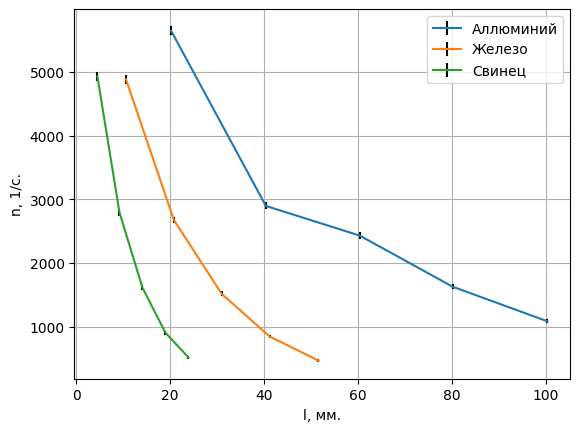

In [ ]:
fig = plt.figure()

plt.errorbar(thickness_allumini, n_allumini_time_norm, xerr=0.1, yerr=[error_of_one(i) for i in n_allumini_time_norm], ecolor='black', label="Аллюминий")

plt.errorbar(thickness_iron, n_iron_time_norm, xerr=0.1, yerr=[error_of_one(i) for i in n_iron_time_norm], ecolor='black', label="Железо")

plt.errorbar(thickness_plumbum, n_plumbum_time_norm, xerr=0.1, yerr=[error_of_one(i) for i in n_plumbum_time_norm], ecolor='black',  label="Свинец")

plt.grid()
plt.xlabel("l, мм.")
plt.ylabel("n, 1/c.")
plt.legend()

plt.savefig("all_samples.png")
plt.show()

## В логарифмическом масштабе

In [ ]:
n_allumini_log = np.log(N_0 / n_allumini_time_norm)
n_iron_log = np.log(N_0 / n_iron_time_norm)
n_plumbum_log = np.log(N_0 / n_plumbum_time_norm)

In [ ]:
n_allumini_log

array([0.42255665, 1.09006868, 1.26531525, 1.66576846, 2.07112616])

In [ ]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)

    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x

    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)

    return MNK_info (k, b, sigma_k, sigma_b)

Аллюминий: k=0.0194 +/- 0.0015; b=0.1357 +/- 0.0413
Железо: k=0.0569 +/- 0.0002; b=-0.0267 +/- 0.0030
Свинец: k=0.1158 +/- 0.0005; b=0.0470 +/- 0.0037


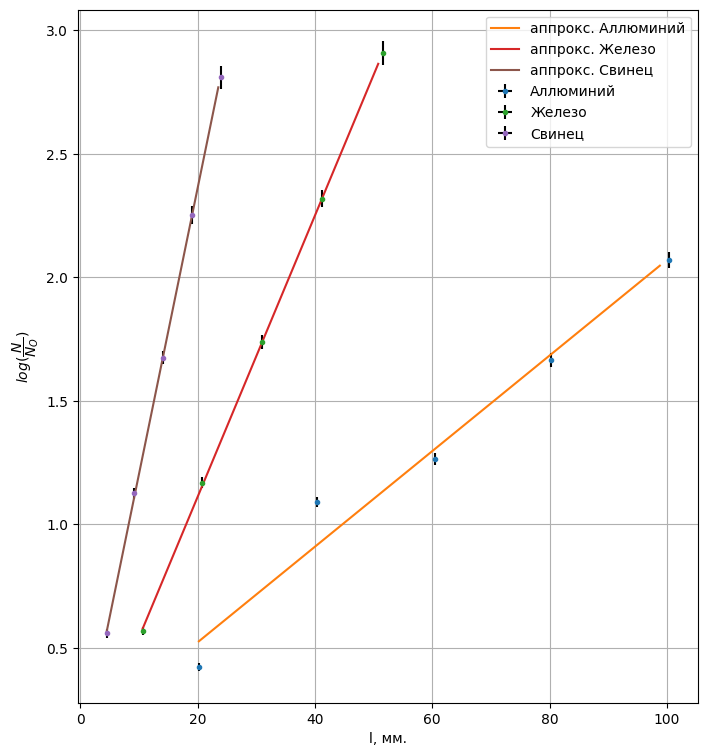

In [ ]:
fig = plt.figure(figsize=(8, 9))

def error(value):
    return np.sqrt( ( np.sqrt(value) / value )**2 + ( np.sqrt(N_0) / N_0) **2)

    # return np.sqrt(error_of_sequence(seq) ** 2 + error_of_sequence(sourse_data / 60)**2)

def draw_line(x, y, label):
    mnk_info = MNK(x, y)
    X_data = np.arange(x.min(), x.max(), (x.max() - x.min()) / ( 10 * x.size ))
    Y_data = mnk_info.k * X_data + mnk_info.b
    plt.plot(X_data, Y_data, label=label)

    return mnk_info

def print_coef(mnk_info, name):
    print(f"{name}: k={mnk_info.k:.4f} +/- {mnk_info.sigma_k:.4f}; b={mnk_info.b:.4f} +/- {mnk_info.sigma_b:.4f}")

plt.errorbar(thickness_allumini, n_allumini_log, xerr=0.1, yerr=[error(val) for val in n_allumini_time_norm], fmt=".", ecolor='black', label="Аллюминий")
info_al = draw_line(thickness_allumini, n_allumini_log, "аппрокс. Аллюминий")
print_coef (info_al, "Аллюминий")

plt.errorbar(thickness_iron, n_iron_log, xerr=0.1, yerr=[error(val) for val in n_iron_time_norm], fmt=".",  ecolor='black', label="Железо")
info_ir = draw_line(thickness_iron, n_iron_log, "аппрокс. Железо")
print_coef (info_ir, "Железо")

plt.errorbar(thickness_plumbum, n_plumbum_log, xerr=0.1, yerr=[error(val) for val in n_plumbum_time_norm], fmt=".", ecolor='black',  label="Свинец")
info_pb = draw_line(thickness_plumbum, n_plumbum_log, "аппрокс. Свинец")
print_coef (info_pb, "Свинец")

plt.grid()
plt.xlabel("l, мм.")
plt.ylabel("$log(\dfrac{N}{N_O})$")
plt.legend()

plt.savefig("all_samples_log.png")
plt.show()